In [11]:
import numpy as np
import pandas as pd
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os
import sys
import pathlib
from pathlib import Path
from sklearn.metrics import r2_score

In [2]:
current_path = Path.cwd()
washino_dir = current_path.parent.parent

In [3]:
swallowing = washino_dir / 'swallowing'
os.chdir(swallowing)

In [4]:
import swallowing_recognition
from swallowing_recognition import audio

In [5]:
fluid = washino_dir / 'fluid_intake'
os.chdir(fluid)

In [6]:
import fluid_intake_estimate
from fluid_intake_estimate import variable_data_set

/home/s2/Desktop/washino/swallowing
/home/s2/Desktop/washino/swallowing


In [7]:
directory_path = fluid / 'dataset'

In [21]:
names = ['washino', 'haruki', 'ezumi', 'hikaru', 'ibuki', 'kanata', 'kazuki', 'kishimoto', 'kosasayama', 'mocchi', 'nakaryo', 'ruku', 'shibata', 'soichiro', 'tsuji']
data = variable_data_set.VariableDataSet(786, scale=0, time_range = 100000)

count = 0

for name in names:    
    path = directory_path / name
    wav_files = glob.glob(os.path.join(path, '*.wav'))
    wav_file_count = len(wav_files)    
    
    csv_path = path / f'{name}.csv'    
    data.csv_to_dataset(path, csv_path, count, signal_processing='fft')
    count += wav_file_count
    print('count', count)
    print('length', len(data.length))

8
[]
161
[]
count 352
length 352
count 382
length 382
count 413
length 413
count 444
length 444
447
[]
count 474
length 474
count 504
length 504
count 538
length 538
count 571
length 571
count 601
length 601
627
[]
count 631
length 631
count 661
length 661
count 694
length 694
count 724
length 724
count 755
length 755
count 786
length 786


In [27]:
x = np.array(data.length)
y = data.y

In [28]:
print(x.shape)
print(y.shape)

(786,)
(786,)


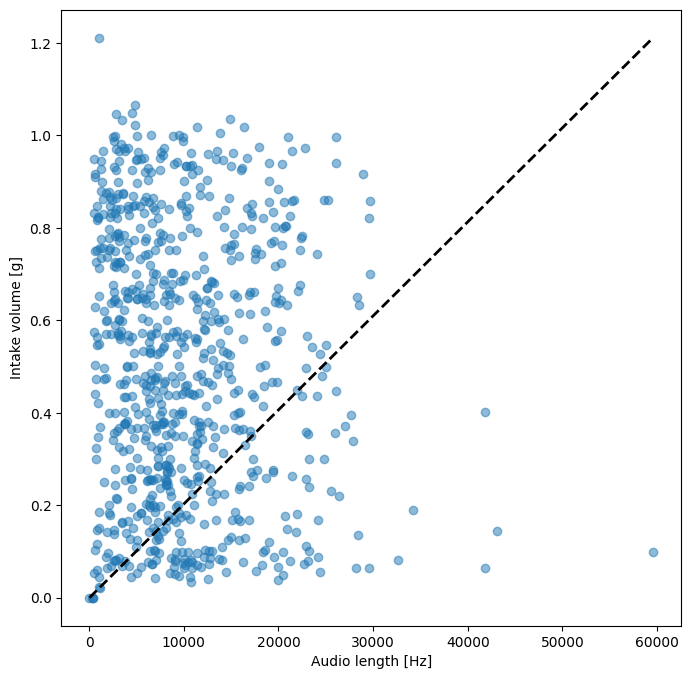

Correlation Coefficient: -0.08025183439709857
Overall R² score: -1.9234131098312908


In [30]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Audio length [Hz]')
plt.ylabel('Intake volume [g]')

plt.plot([x.min(), x.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()
plt.close()

correlation = np.corrcoef(x, y)[0, 1]
print("Correlation Coefficient:", correlation)
overall_r2_score = r2_score(x, y)
print("Overall R² score:", overall_r2_score)